<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

In [1]:
import numpy as np
import pandas as pd
import librosa
import os

##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
recordings = '/content/drive/My Drive/recordings'
all_files=[]
for filename in os.listdir('/content/drive/My Drive/recordings'):
    if filename.endswith('.wav'):
        with open(os.path.join('/content/drive/My Drive/recordings', filename)) as f:
            #content = f.read()
            all_files.append(filename)


  

In [ ]:
all_files

['8_theo_39.wav',
 '8_nicolas_6.wav',
 '2_yweweler_4.wav',
 '9_nicolas_21.wav',
 '8_yweweler_46.wav',
 '7_yweweler_45.wav',
 '7_jackson_8.wav',
 '4_theo_7.wav',
 '6_nicolas_41.wav',
 '4_nicolas_29.wav',
 '0_theo_23.wav',
 '2_theo_26.wav',
 '3_nicolas_2.wav',
 '1_nicolas_11.wav',
 '4_nicolas_5.wav',
 '0_theo_10.wav',
 '0_nicolas_7.wav',
 '1_theo_12.wav',
 '7_yweweler_29.wav',
 '6_theo_3.wav',
 '7_jackson_46.wav',
 '9_theo_16.wav',
 '8_nicolas_23.wav',
 '4_yweweler_10.wav',
 '7_nicolas_23.wav',
 '0_nicolas_26.wav',
 '3_theo_18.wav',
 '5_yweweler_36.wav',
 '8_jackson_36.wav',
 '1_yweweler_28.wav',
 '0_yweweler_13.wav',
 '4_jackson_3.wav',
 '2_yweweler_45.wav',
 '3_yweweler_47.wav',
 '6_nicolas_43.wav',
 '7_jackson_7.wav',
 '1_jackson_13.wav',
 '6_jackson_25.wav',
 '2_jackson_37.wav',
 '6_nicolas_6.wav',
 '5_jackson_40.wav',
 '0_theo_14.wav',
 '2_jackson_6.wav',
 '1_theo_43.wav',
 '4_nicolas_40.wav',
 '4_nicolas_14.wav',
 '4_nicolas_26.wav',
 '8_nicolas_49.wav',
 '4_yweweler_49.wav',
 '0_n

<font size=4>Grader function 1 </font>

In [ ]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [ ]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
label = [i[0] for i in all_files]
all_files = ['/content/drive/My Drive/recordings/'+i for i in all_files]

In [ ]:
df_audio = pd.DataFrame()
df_audio['path'] = all_files
df_audio['label'] = label

In [ ]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [ ]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [ ]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [ ]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
X=df_audio['path']; y = df_audio['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, stratify = y, random_state = 45, test_size=0.30)

<font size=4>Grader function 3 </font>

In [ ]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [ ]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [ ]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
from tqdm import tqdm 
X_train_processed = [load_wav(i) for i in tqdm(X_train)]
X_test_processed = [load_wav(i) for i in tqdm(X_test)]

100%|██████████| 600/600 [05:37<00:00,  1.78it/s]


In [ ]:
import pickle
with open('/content/drive/My Drive/recordings/X_train_processed.pkl','wb') as f:
  pickle.dump(X_train_processed,f)
with open('/content/drive/My Drive/recordings/X_test_processed.pkl','wb') as f:
  pickle.dump(X_test_processed,f)
with open('/content/drive/My Drive/recordings/X_train.pkl','wb') as f:
  pickle.dump(X_train,f)
with open('/content/drive/My Drive/recordings/X_test.pkl','wb') as f:
  pickle.dump(X_test,f)
with open('/content/drive/My Drive/recordings/y_train.pkl','wb') as f:
  pickle.dump(y_train,f)
with open('/content/drive/My Drive/recordings/y_test.pkl','wb') as f:
  pickle.dump(y_test,f)
with open('/content/drive/My Drive/recordings/all_files.pkl','wb') as f:
  pickle.dump(all_files,f)
with open('/content/drive/My Drive/recordings/label.pkl','wb') as f:
  pickle.dump(label,f)
with open('/content/drive/My Drive/recordings/X.pkl','wb') as f:
  pickle.dump(X,f)
with open('/content/drive/My Drive/recordings/y.pkl','wb') as f:
  pickle.dump(y,f)

In [3]:
import pickle
with open('/content/drive/My Drive/recordings/X_train_processed.pkl','rb') as f:
  X_train_processed=pickle.load(f)
with open('/content/drive/My Drive/recordings/X_test_processed.pkl','rb') as f:
  X_test_processed=pickle.load(f)
with open('/content/drive/My Drive/recordings/X_train.pkl','rb') as f:
  X_train=pickle.load(f)
with open('/content/drive/My Drive/recordings/X_test.pkl','rb') as f:
  X_test=pickle.load(f)
with open('/content/drive/My Drive/recordings/y_train.pkl','rb') as f:
  y_train=pickle.load(f)
with open('/content/drive/My Drive/recordings/y_test.pkl','rb') as f:
  y_test=pickle.load(f)
with open('/content/drive/My Drive/recordings/all_files.pkl','rb') as f:
  all_files=pickle.load(f)
with open('/content/drive/My Drive/recordings/label.pkl','rb') as f:
  label=pickle.load(f)
with open('/content/drive/My Drive/recordings/X.pkl','rb') as f:
  X=pickle.load(f)
with open('/content/drive/My Drive/recordings/y.pkl','rb') as f:
  y=pickle.load(f)

In [4]:
X_train_vals = X_train_processed
X_test_vals=X_test_processed
X_train_processed=pd.DataFrame()
X_train_processed['raw_data'] =[X_train_vals[i][0] for i in range(len(X_train_vals))]
X_train_processed['duration'] =[X_train_vals[i][1] for i in range(len(X_train_vals))]
X_test_processed=pd.DataFrame()
X_test_processed['raw_data'] = [X_test_vals[i][0] for i in range(len(X_test_vals))]
X_test_processed['duration'] = [X_test_vals[i][1] for i in range(len(X_test_vals))]

In [ ]:
#X_train_processed = X_train_processed.reindex_like(pd.DataFrame(X_train))
#X_test_processed =  X_train_processed.reindex_like(pd.DataFrame(X_test))

In [5]:
X_train_processed.head()

,raw_data,duration
0,"[0.00031743426, 0.0005046424, 0.00026486837, -...",0.292789
1,"[7.52339e-05, 0.0001356962, 0.00018862588, 0.0...",0.280635
2,"[-0.0012102715, -0.0076377015, -0.012906657, -...",0.266757
3,"[-0.00058412284, -0.000517757, -0.00036712666,...",0.283401
4,"[0.010563009, 0.012773626, 0.013365835, 0.0131...",0.688753


(array([495., 764., 122.,  17.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.14353741, 0.34877551, 0.55401361, 0.7592517 , 0.9644898 ,
        1.16972789, 1.37496599, 1.58020408, 1.78544218, 1.99068027,
        2.19591837]),
 <a list of 10 Patch objects>)

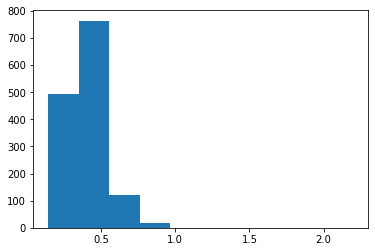

In [ ]:
import matplotlib.pyplot as plt
plt.hist(X_train_processed['duration'])

[]

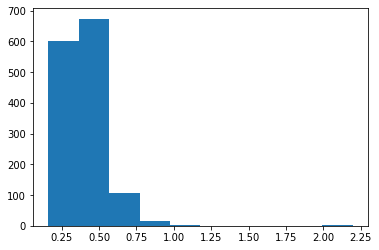

In [ ]:
#plot the histogram of the duration for train


(array([263., 289.,  41.,   5.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.15741497, 0.36995011, 0.58248526, 0.79502041, 1.00755556,
        1.2200907 , 1.43262585, 1.645161  , 1.85769615, 2.07023129,
        2.28276644]),
 <a list of 10 Patch objects>)

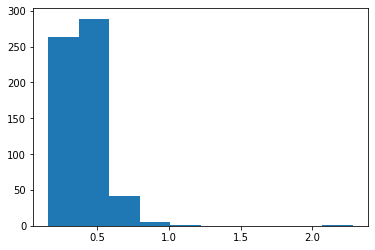

In [ ]:
plt.hist(X_test_processed['duration'])

(array([224., 320.,  50.,   5.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.14353741, 0.35746032, 0.57138322, 0.78530612, 0.99922902,
        1.21315193, 1.42707483, 1.64099773, 1.85492063, 2.06884354,
        2.28276644]),
 <a list of 10 Patch objects>)

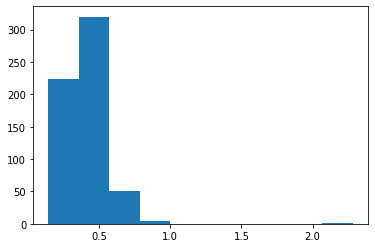

In [ ]:
#plot the histogram of the duration for trian



In [ ]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
range = (np.arange(0,100,10)).tolist()
for i in range:
  print(i,'th percentile is: ',np.percentile(X_train_processed['duration'],i))


0 th percentile is 0.16104308390022676
10 th percentile is 0.25848072562358276
20 th percentile is 0.2974331065759637
30 th percentile is 0.3297777777777778
40 th percentile is 0.3569160997732426
50 th percentile is 0.38945578231292516
60 th percentile is 0.41328798185941046
70 th percentile is 0.4444671201814059
80 th percentile is 0.4826848072562358
90 th percentile is 0.5531655328798186
100 th percentile is 2.195918367346939


In [ ]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
range = (np.arange(0,101,10)).tolist()
for i in range:
  print(i,'th percentile is: ',np.percentile(X_train_processed['duration'],i))

0 th percentile is:  0.1435374149659864
10 th percentile is:  0.2633877551020408
20 th percentile is:  0.30003628117913833
30 th percentile is:  0.33224943310657595
40 th percentile is:  0.35950113378684806
50 th percentile is:  0.3900907029478458
60 th percentile is:  0.4184126984126984
70 th percentile is:  0.44769160997732427
80 th percentile is:  0.485922902494331
90 th percentile is:  0.5549160997732426
100 th percentile is:  2.195918367346939


In [ ]:
##print 90 to 100 percentile values with step size of 1. 
range = (np.arange(90,100,1)).tolist()
for i in range:
  print(i,'th percentile is: ',np.percentile(X_train_processed['duration'],i))


90 th percentile is 0.5531655328798186
91 th percentile is 0.5669832199546486
92 th percentile is 0.5790349206349206
93 th percentile is 0.599510657596372
94 th percentile is 0.611208163265306
95 th percentile is 0.6316009070294784
96 th percentile is 0.6431455782312925
97 th percentile is 0.6635741496598639
98 th percentile is 0.6957514739229022
99 th percentile is 0.79601179138322
100 th percentile is 2.195918367346939


In [ ]:
##print 90 to 100 percentile values with step size of 1. 
range = (np.arange(90,101,1)).tolist()
for i in range:
  print(i,'th percentile is: ',np.percentile(X_train_processed['duration'],i))

90 th percentile is:  0.5549160997732426
91 th percentile is:  0.5708140589569161
92 th percentile is:  0.5810503401360544
93 th percentile is:  0.5997356009070297
94 th percentile is:  0.6143074829931973
95 th percentile is:  0.6254104308390022
96 th percentile is:  0.6431455782312925
97 th percentile is:  0.6647700680272108
98 th percentile is:  0.6925750566893424
99 th percentile is:  0.7930458049886621
100 th percentile is:  2.195918367346939


<font size=4>Grader function 4 </font>

In [ ]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [6]:
max_length  = 17640

In [7]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask
X_train_pad_seq=[];X_train_mask=[];
X_test_pad_seq=[];X_test_mask=[];
## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.
for i in X_train_processed['raw_data']:
    if len(i) > max_length:
      X_train_pad_seq.append(i[0:max_length])
      X_train_mask.append([True]*max_length)
    else:
      temp = len(i)
      temp1 = [0]*(max_length-temp)
      X_train_pad_seq.append(i.tolist()+temp1)
      temp2 = [False]*(max_length-temp)
      another_temp = [True]*len(i) + temp2
      X_train_mask.append(another_temp)
#########################################################
for i in X_test_processed['raw_data']:
    if len(i) > max_length:
      X_test_pad_seq.append(i[0:max_length])
      X_test_mask.append([True]*max_length)
    else:
      temp = len(i)
      temp1 = [0]*(max_length-temp)
      X_test_pad_seq.append(i.tolist()+temp1)
      temp2 = [False]*(max_length-temp)
      another_temp = [True]*len(i) + temp2
      X_test_mask.append(another_temp)
    



In [8]:
X_train_pad_seq=np.asarray(X_train_pad_seq)
X_train_mask = np.asarray(X_train_mask)
X_test_pad_seq = np.asarray(X_test_pad_seq)
X_test_mask = np.asarray(X_test_mask)

<font size=4>Grader function 5 </font>

In [21]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 

<pre>
Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). 
3. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
4. make sure that it won't overfit. 
5. You are free to include any regularization
</pre>

In [9]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [31]:
def f1_m(y_true, y_pred):
  y_pred1 = model.predict([X_test_pad_seq,X_test_mask])
  y_pred = np.argmax(y_pred1, axis=1)

  # Print f1, precision, and recall scores
  return f1_score(y_test, y_pred , average="micro")

In [10]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
class Metrics(tf.keras.callbacks.Callback):
  def __init__(self, val_data, batch_size = 20):
        super().__init__()
        self.validation_data = val_data
        self.batch_size = batch_size
  def on_train_begin(self, logs={}):
    self.val_f1s = []
    
 
  def on_epoch_end(self, epoch, logs={}):
    
    val0 = self.validation_data[0];
    val_predict = self.model.predict(val0)
    
    #val_prob=((np.asarray(self.model.predict(new_data))))#.round())
    val_targ = self.validation_data[1]
    #val_predict = val_predict.argmax(axis=-1)
    
    _val_f1 = f1_score(val_targ, val_predict,average='micro')
    
    self.val_f1s.append(_val_f1)
    print(' val_f1: {}' .format(_val_f1))
 

val_input=[X_test_pad_seq,X_test_mask]
metrics2 = Metrics(val_data=(val_input,y_test),batch_size=32)

In [19]:
## as discussed above, please write the LSTM
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
input_layer= Input(shape=(17640,1,),name='input_layer')
input_mask=Input(shape=(17640,),name='input_mask',dtype='bool')
x = LSTM(25)(input_layer,mask=input_mask)
x=Dense(50,activation='relu', kernel_initializer='he_normal')(x)
output=Dense(10,activation='softmax')(x)
model =Model(inputs=[input_layer,input_mask],outputs=output)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [25]:
import datetime
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor =0.4)
checkpoint_path = "/content/drive/My Drive/recordings/my_model_weights.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/recordings/my_model_weights{epoch}.hdf5',  verbose=1, save_weights_only=False,save_best_only=False, mode='auto') 
log_dir="/content/drive/My Drive/recordings/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

model.fit([X_train_pad_seq,X_train_mask],y_train,validation_data=([X_test_pad_seq,X_test_mask],y_test), epochs = 25, batch_size=32,callbacks=[metrics2,reduce_lr,tensorboard_callback])
model.save_weights('/content/drive/My Drive/recordings/my_model_weights{epoch}.hdf5')
model.save('/content/drive/My Drive/recordings/')

Epoch 1/25


UnimplementedError: ignored

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 25)           2700        input_layer[0][0]                
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           1300        lstm[0][0]            

In [ ]:
#train your model

### 2. Converting into spectrogram and giving spectrogram data as input  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

In [ ]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [ ]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)


<font size=4>Grader function 6 </font>

In [ ]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

### 3. data augmentation  
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

In [ ]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [ ]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [ ]:
len(aug_temp)

9

As discussed above, for one data point, we will get 9 augmented data points.  
We have 2000 data points(train plus test) so, after augmentation we will get 18000 ( train - 12600, test - 5400). 

do the above steps i.e training with raw data and spectrogram data with augmentation.